# 목표 : '취급액' 예측하기

In [1]:
import pandas as pd

#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale,robust_scale
# matplotlib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline

# 1. 데이터 불러오기 & 정보 확인

In [2]:
df_raw = pd.read_csv("2019년 실적데이터.csv", encoding='cp949')
df_raw.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   방송일시    38309 non-null  object 
 1   노출(분)   21525 non-null  float64
 2   마더코드    38309 non-null  int64  
 3   상품코드    38309 non-null  int64  
 4   상품명     38309 non-null  object 
 5   상품군     38309 non-null  object 
 6   판매단가    38309 non-null  object 
 7    취급액    37372 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


> 판매단가, 취급액이 object  
==> int 변환 필요

In [4]:
df_raw.describe()

,노출(분),마더코드,상품코드
count,21525.000000,38309.000000,38309.000000
mean,20.173798,100390.972148,201219.923334
std,3.633283,249.927870,735.677344
min,2.000000,100000.000000,200000.000000
25%,20.000000,100155.000000,200550.000000
50%,20.000000,100346.000000,201167.000000
75%,20.000000,100596.000000,201863.000000
max,60.000000,100849.000000,202513.000000


# 2, 결측치,이상치 확인 및 처리

In [5]:
# 결측치 개수 확인
df_raw.isnull().sum() 

방송일시         0
노출(분)    16784
마더코드         0
상품코드         0
상품명          0
상품군          0
판매단가         0
 취급액       937
dtype: int64

### '노출(분)'

노출(분)에 대한 결측값은 바로 앞 행과 동시간대이므로  
==> 바로 앞 행 값으로 결측값 채우면 된다.

In [6]:
df_raw['노출(분)'] = df_raw['노출(분)'].fillna(method='ffill') # 앞 방향으로 채우기

df_raw.isnull().sum() 

방송일시       0
노출(분)      0
마더코드       0
상품코드       0
상품명        0
상품군        0
판매단가       0
 취급액     937
dtype: int64

In [7]:
df_raw['노출(분)']= df_raw['노출(분)'].astype(int)

### '취급액'

결측값 있는 행 전체 삭제

In [8]:
df_raw = df_raw.dropna(axis=0)

df_raw.isnull().sum() 

방송일시     0
노출(분)    0
마더코드     0
상품코드     0
상품명      0
상품군      0
판매단가     0
 취급액     0
dtype: int64

C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lsl\anaconda3\envs\venv\lib\site-packages\matplotlib\backends\backend_agg.py

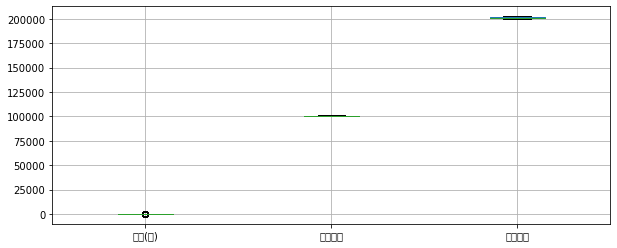

In [9]:
# 이상치 확인
df_raw.boxplot(figsize=(10,4))

# 3. 컬럼 별 정리

### '판매단가'

In [10]:
df_raw['판매단가']= df_raw['판매단가'].replace(',','', regex=True).astype(int)
df_raw['판매단가']

0         39900
1         39900
2         39900
3         39900
4         39900
          ...  
38299    148000
38300    178000
38301    168000
38302    158000
38303    148000
Name: 판매단가, Length: 37372, dtype: int32

### '취급액'

In [11]:
df_raw[' 취급액 ']= df_raw[' 취급액 '].replace(',','', regex=True).astype(int)
df_raw[' 취급액 ']

0          2099000
1          4371000
2          3262000
3          6955000
4          6672000
           ...    
38299     10157000
38300     50929000
38301    104392000
38302     13765000
38303     46608000
Name:  취급액 , Length: 37372, dtype: int32

### '방송일시'

In [12]:
year_month_day = df_raw["방송일시"].str.split("-", n=2, expand=True)
df_raw['년'] = year_month_day[0].to_frame()
df_raw['월'] = year_month_day[1].to_frame()
df_raw['일_시간'] = year_month_day[2].to_frame()
df_raw.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,년,월,일_시간
0,2019-01-01 6:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,2019,01,01 6:00
1,2019-01-01 6:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,2019,01,01 6:00
2,2019-01-01 6:20,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,2019,01,01 6:20
3,2019-01-01 6:20,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,2019,01,01 6:20
4,2019-01-01 6:40,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,2019,01,01 6:40


In [13]:
hour = df_raw["일_시간"].str.split(" ", n=1, expand=True)
df_raw['일'] = hour[0].to_frame()
df_raw['시간'] = hour[1].to_frame()

df_raw = df_raw.drop(['방송일시', '일_시간'], axis=1)
df_raw.head()

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,년,월,일,시간
0,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,2019,01,01,6:00
1,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,2019,01,01,6:00
2,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,2019,01,01,6:20
3,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,2019,01,01,6:20
4,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,2019,01,01,6:40


In [14]:
df_raw = df_raw.drop(['년'], axis=1)

In [15]:
df_raw['월']= df_raw['월'].astype(int)
df_raw['일']= df_raw['일'].astype(int)

In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   노출(분)   37372 non-null  int32 
 1   마더코드    37372 non-null  int64 
 2   상품코드    37372 non-null  int64 
 3   상품명     37372 non-null  object
 4   상품군     37372 non-null  object
 5   판매단가    37372 non-null  int32 
 6    취급액    37372 non-null  int32 
 7   월       37372 non-null  int32 
 8   일       37372 non-null  int32 
 9   시간      37372 non-null  object
dtypes: int32(5), int64(2), object(3)
memory usage: 2.4+ MB


### '상품군'

In [17]:
df_raw['상품군'].value_counts()

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: 상품군, dtype: int64

In [18]:
df_raw['상품군']= df_raw['상품군'].replace('주방','0', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('가전','1', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('의류','2', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('속옷','3', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('잡화','4', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('농수축','5', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('생활용품','6', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('가구','7', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('이미용','8', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('건강기능','9', regex=True)
df_raw['상품군']= df_raw['상품군'].replace('침구','10', regex=True)
df_raw['상품군'] = df_raw['상품군'].astype(int)

In [19]:
df_raw.head()

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,월,일,시간
0,20,100346,201072,테이트 남성 셀린니트3종,2,39900,2099000,1,1,6:00
1,20,100346,201079,테이트 여성 셀린니트3종,2,39900,4371000,1,1,6:00
2,20,100346,201072,테이트 남성 셀린니트3종,2,39900,3262000,1,1,6:20
3,20,100346,201079,테이트 여성 셀린니트3종,2,39900,6955000,1,1,6:20
4,20,100346,201072,테이트 남성 셀린니트3종,2,39900,6672000,1,1,6:40


### '상품명'

우선 삭제

In [20]:
df_raw = df_raw.drop(['상품명', '시간'], axis=1)

### '시간'

우선 삭제

In [21]:
df_raw = df_raw.drop(['월','일'], axis=1)

In [22]:
df = df_raw
df.head()

,노출(분),마더코드,상품코드,상품군,판매단가,취급액
0,20,100346,201072,2,39900,2099000
1,20,100346,201079,2,39900,4371000
2,20,100346,201072,2,39900,3262000
3,20,100346,201079,2,39900,6955000
4,20,100346,201072,2,39900,6672000


# 4. scale 변환

#### 1) scale 변환 : 평균, 표준편차 기준

In [23]:
df_y = df[' 취급액 ']
df_x = df.drop(' 취급액 ', axis=1, inplace=False)

In [24]:
df_scale_std=scale(df_x)
df_scale_std=pd.DataFrame(df_scale_std, columns=df_x.columns)
df_scale_std.head()

,노출(분),마더코드,상품코드,상품군,판매단가
0,-0.122458,-0.173042,-0.189586,-0.468996,-0.585286
1,-0.122458,-0.173042,-0.180098,-0.468996,-0.585286
2,-0.122458,-0.173042,-0.189586,-0.468996,-0.585286
3,-0.122458,-0.173042,-0.180098,-0.468996,-0.585286
4,-0.122458,-0.173042,-0.189586,-0.468996,-0.585286


In [25]:
#scale 변환결과 확인: 요약통계량:pandas.DataFrame.describe()
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,노출(분),마더코드,상품코드,상품군,판매단가
count,37372.000,37372.000,37372.000,37372.000,37372.000
mean,0.000,-0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-5.898,-1.549,-1.643,-1.216,-0.622
25%,-0.122,-0.941,-0.912,-0.842,-0.559
50%,-0.122,-0.173,-0.070,-0.096,-0.490
75%,-0.122,0.825,0.882,0.651,0.056
max,6.294,1.828,1.763,2.517,10.202


#### 2) scale 변환 : 최소, 최대값 기준

In [26]:
df_scale_minmax = minmax_scale(df_raw)
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_raw.columns)
df_scale_minmax.head().round(3)

,노출(분),마더코드,상품코드,상품군,판매단가,취급액
0,0.474,0.408,0.427,0.2,0.003,0.006
1,0.474,0.408,0.429,0.2,0.003,0.013
2,0.474,0.408,0.427,0.2,0.003,0.010
3,0.474,0.408,0.429,0.2,0.003,0.021
4,0.474,0.408,0.427,0.2,0.003,0.021


In [27]:
#scale 변환결과 확인: 요약통계량:pandas.DataFrame.describe()
df_scale_minmax.describe().round(3) #최소 0, 최대 1로 변환됨

,노출(분),마더코드,상품코드,상품군,판매단가,취급액
count,37372.000,37372.000,37372.000,37372.000,37372.000,37372.000
mean,0.484,0.459,0.482,0.326,0.057,0.068
std,0.082,0.296,0.294,0.268,0.092,0.063
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.474,0.180,0.214,0.100,0.006,0.021
50%,0.474,0.408,0.462,0.300,0.012,0.050
75%,0.474,0.703,0.741,0.500,0.063,0.098
max,1.000,1.000,1.000,1.000,1.000,1.000


#### 3) scale 변환 : 로버스트

In [28]:
df_scale_robust = robust_scale(df_raw)

df_scale_robust = pd.DataFrame(df_scale_robust,columns=df_raw.columns)
df_scale_desc.head()

,노출(분),마더코드,상품코드,상품군,판매단가
count,3.737200e+04,3.737200e+04,3.737200e+04,3.737200e+04,3.737200e+04
mean,4.350106e-16,-1.295526e-14,-1.927128e-15,5.475658e-17,3.042032e-18
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-5.897615e+00,-1.549490e+00,-1.642524e+00,-1.215538e+00,-6.223360e-01
25%,-1.224577e-01,-9.408292e-01,-9.119888e-01,-8.422667e-01,-5.591728e-01


In [29]:
#scale 변환결과 확인: 요약통계량:pandas.DataFrame.describe()
df_scale_robust.describe().round(3)

,노출(분),마더코드,상품코드,상품군,판매단가,취급액
count,37372.000,37372.000,37372.000,37372.000,37372.000,37372.000
mean,0.382,0.098,0.039,0.064,0.796,0.232
std,3.117,0.566,0.557,0.670,1.625,0.816
min,-18.000,-0.779,-0.876,-0.750,-0.216,-0.650
25%,0.000,-0.435,-0.469,-0.500,-0.113,-0.374
50%,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.565,0.531,0.500,0.887,0.626
max,20.000,1.133,1.022,1.750,17.378,12.359


#### 4) Scale 변환 결과 비교

In [30]:
# df_rtspulse = pd.DataFrame()
# df_rtspulse['raw'] = df_raw[' 취급액 ']
# df_rtspulse['Standard'] = df_scale_std[' 취급액 ']
# df_rtspulse['MinMax'] = df_scale_minmax[' 취급액 ']
# df_rtspulse['Robust'] = df_scale_robust[' 취급액 ']
# df_rtspulse.head().round(3)
# df_rtspulse.describe().round(3)

In [31]:
# df_rtspulse[['raw','Standard','MinMax','Robust']].hist(figsize=(10,5))

# 5. 다중공선성 확인

In [32]:
from statsmodels.api import qqplot,add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
#설명변수 간의 다중공선성 확인: 설명변수 데이터 생성 및 상수항 추가
df_raw_x = df_scale_std

#statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

#DataFrame으로 지정
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values,i)
               for i in range(df_raw_x_const.shape[1])]
#VIF 정렬
df_vif.sort_values('VIF', inplace = True)
df_vif.round(3)

,variable,VIF
0,const,1.000
1,노출(분),1.042
4,상품군,1.067
5,판매단가,1.153
2,마더코드,24.015
3,상품코드,24.115


In [34]:
# 다중공선성 높은 변수 제거 후 공선성 재확인
df_raw_x = df.drop(['마더코드','상품코드'],axis=1)

#statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

#DataFrame으로 지정
df_vif = pd.DataFrame()
df_vif['variable'] = df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values,i)
               for i in range(df_raw_x_const.shape[1])]
#VIF 정렬
df_vif.sort_values('VIF', inplace = True)
df_vif.round(3)

,variable,VIF
1,노출(분),1.027
2,상품군,1.050
4,취급액,1.073
3,판매단가,1.138
0,const,46.029


# 6. 모델 생성

In [35]:
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 의사결정나무_예측
from sklearn.tree import DecisionTreeRegressor
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor as RFR
# 그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor as GBR

# 평가함수
from statsmodels.tools.eval_measures import rmse
#데이터 분할:train, test
from sklearn.model_selection import train_test_split

In [36]:
# # 목표변수, 설명변수 데이터 지정
# df_y = df[' 취급액 ']
# df_x = df.drop(' 취급액 ', axis=1, inplace=False)

In [37]:
# # 목표변수, 설명변수 데이터 지정
# df_y = df_scale_std[' 취급액 ']
# df_x = df_scale_std.drop(' 취급액 ', axis=1, inplace=False)

In [38]:
df_x = df_scale_std

## 1) 데이터 구성하기
### train(0.4) : validation(0.3) : test(0.3)의 비율로 분할

In [39]:
df_train_x,df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,test_size = 0.3, shuffle = True, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (26160, 5)
train data Y size : (26160,)
test data X size : (11212, 5)
test data X size : (11212,)


In [40]:
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y ,test_size = 3/7, shuffle = True, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_val_x.shape))
print('validation data X size : {}'.format(df_val_y.shape))

train data X size : (14948, 5)
train data Y size : (14948,)
validation data X size : (11212, 5)
validation data X size : (11212,)


In [41]:
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_val_x.shape))
print('validation data X size : {}'.format(df_val_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (14948, 5)
train data Y size : (14948,)
validation data X size : (11212, 5)
validation data X size : (11212,)
test data X size : (11212, 5)
test data X size : (11212,)


## 2) 모델 생성

In [42]:
lr_model = LinearRegression()
lr_model.fit(df_train_x,df_train_y)

# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(lr_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(lr_model.score(df_val_x,df_val_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(lr_model.score(df_test_x,df_test_y)))

Score on training set:0.075
Score on validation set:0.082
Score on test set:0.076


In [43]:
dt_model = DecisionTreeRegressor(random_state=1234)
dt_model.fit(df_train_x,df_train_y)

# Train 데이터 설명력
print('Score on training set:{:.3f}'.format(dt_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(dt_model.score(df_val_x,df_val_y)))
# Test 데이터 설명력
print('Score on test set:{:.3f}'.format(dt_model.score(df_test_x,df_test_y)))

Score on training set:0.626
Score on validation set:0.539
Score on test set:0.545


In [44]:
rf_model = RFR(random_state=1234)
rf_model.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(rf_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(rf_model.score(df_val_x,df_val_y)))
#test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_model.score(df_test_x,df_test_y)))

Score on training set:0.623
Score on validation set:0.552
Score on test set: 0.555


In [45]:
gb_model=GBR(random_state=1234)
gb_model.fit(df_train_x,df_train_y)
#Train 데이터 설명력
print("Score on training set:{:.3f}".format(gb_model.score(df_train_x,df_train_y)))
# validation 데이터 설명력
print('Score on validation set:{:.3f}'.format(gb_model.score(df_val_x,df_val_y)))
#test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_model.score(df_test_x,df_test_y)))

Score on training set:0.377
Score on validation set:0.389
Score on test set: 0.376


#  7. 모델 평가

In [46]:
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [47]:
#모델리스트, 그래프를 그리기 생성목적
models=["Decision Tree","Random Forest","Gradient Boosting"]
#평가 리스트 초기화
mse,mae=[],[]

#### 의사결정나무

In [48]:
#예측
dt_y_pred=dt_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))

mae.append(mean_absolute_error(df_test_y,dt_y_pred))

#### 랜덤포레스트

In [49]:
#예측
rf_y_pred=rf_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))

mae.append(mean_absolute_error(df_test_y,rf_y_pred))


#### 그래디언트 부스팅

In [50]:
#예측
rf_y_pred=rf_model.predict(df_test_x)

#평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))

mae.append(mean_absolute_error(df_test_y,rf_y_pred))


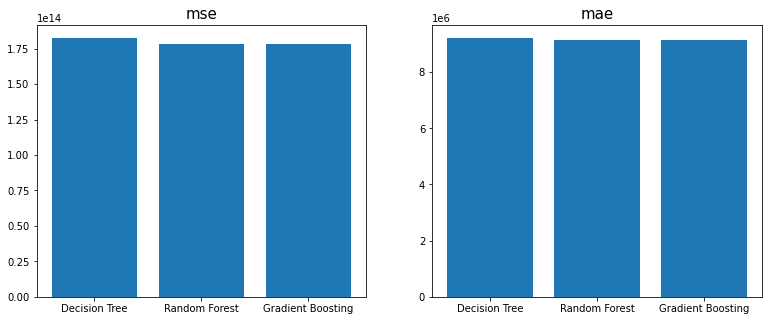

In [51]:
fig,ax=plt.subplots(1,2,figsize=(13,5))

ax[0,].bar(models, mse)
ax[0,].set_title("mse").set_fontsize(15)


ax[1,].bar(models, mae)
ax[1,].set_title("mae").set_fontsize(15)